In [1]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
from tensorflow.python.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
datagen = ImageDataGenerator(rescale=1./255) 


train_generator = datagen.flow_from_directory(
    "train",
    target_size=(250, 250),
    batch_size=16,
    class_mode='categorical')

Found 640 images belonging to 4 classes.


In [3]:
test_generator =  datagen.flow_from_directory(
    'test',
    target_size=(250, 250),
    batch_size=16,
    class_mode='categorical')

Found 130 images belonging to 4 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(250, 250, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
history = model.fit_generator(
 train_generator,
 steps_per_epoch=640//16,
 epochs=55,
 validation_data=test_generator,
 validation_steps=130//16)


Epoch 1/55
40/40 [==============================] - 75s 2s/step - loss: 1.5078 - acc: 0.2594 - val_loss: 1.3591 - val_acc: 0.3281
Epoch 2/55
40/40 [==============================] - 58s 1s/step - loss: 1.3772 - acc: 0.2766 - val_loss: 1.4406 - val_acc: 0.3281
Epoch 3/55
40/40 [==============================] - 62s 2s/step - loss: 1.3722 - acc: 0.3141 - val_loss: 1.2683 - val_acc: 0.2969
Epoch 4/55
40/40 [==============================] - 65s 2s/step - loss: 1.3372 - acc: 0.3547 - val_loss: 1.3177 - val_acc: 0.3047
Epoch 5/55
40/40 [==============================] - 58s 1s/step - loss: 1.2400 - acc: 0.4203 - val_loss: 1.2658 - val_acc: 0.4219
Epoch 6/55
40/40 [==============================] - 65s 2s/step - loss: 1.3392 - acc: 0.3609 - val_loss: 1.1839 - val_acc: 0.4219
Epoch 7/55
40/40 [==============================] - 67s 2s/step - loss: 1.2469 - acc: 0.4391 - val_loss: 1.1680 - val_acc: 0.4453
Epoch 8/55
40/40 [==============================] - 62s 2s/step - loss: 1.2549 - acc: 0.43

In [19]:
test_generator[0]

(array([[[[0.5137255 , 0.34509805, 0.28235295],
          [0.5137255 , 0.34509805, 0.28235295],
          [0.5254902 , 0.34117648, 0.2784314 ],
          ...,
          [0.8941177 , 0.76470596, 0.6901961 ],
          [0.882353  , 0.75294125, 0.6784314 ],
          [0.882353  , 0.75294125, 0.6784314 ]],
 
         [[0.50980395, 0.34117648, 0.2784314 ],
          [0.50980395, 0.34117648, 0.2784314 ],
          [0.5254902 , 0.34117648, 0.2784314 ],
          ...,
          [0.8980393 , 0.7686275 , 0.69411767],
          [0.882353  , 0.75294125, 0.6784314 ],
          [0.882353  , 0.75294125, 0.6784314 ]],
 
         [[0.50980395, 0.34117648, 0.2784314 ],
          [0.50980395, 0.34117648, 0.2784314 ],
          [0.5254902 , 0.34117648, 0.2784314 ],
          ...,
          [0.90196085, 0.7725491 , 0.69803923],
          [0.87843144, 0.7490196 , 0.6745098 ],
          [0.87843144, 0.7490196 , 0.6745098 ]],
 
         ...,
 
         [[0.00784314, 0.01176471, 0.        ],
          [0.01568

In [17]:
"Точност(аккуратность) модели - {:.2%}".format(model.evaluate_generator(test_generator, 40)[1])

'Точност(аккуратность) модели - 66.44%'

In [18]:
train_generator.class_indices

{'acne': 0, 'eczema': 1, 'health': 2, 'herpes': 3}

In [12]:
with open("model.json", "w") as file:
    file.write(model.to_json())

In [13]:
model.save("model")

In [14]:
img = np.expand_dims(image.img_to_array(image.load_img("test/eczema/eczema001.jpg", target_size=(250, 250))), axis=0)
img

array([[[[112.,  84.,  70.],
         [126.,  98.,  84.],
         [139., 111.,  97.],
         ...,
         [ 27.,  21.,  25.],
         [ 26.,  20.,  24.],
         [ 26.,  20.,  24.]],

        [[117.,  89.,  75.],
         [132., 104.,  90.],
         [141., 113.,  99.],
         ...,
         [ 27.,  21.,  25.],
         [ 23.,  17.,  21.],
         [ 23.,  17.,  21.]],

        [[157., 128., 114.],
         [158., 129., 115.],
         [157., 128., 114.],
         ...,
         [ 26.,  20.,  24.],
         [ 21.,  15.,  19.],
         [ 21.,  15.,  19.]],

        ...,

        [[118.,  98.,  91.],
         [120., 100.,  93.],
         [120., 100.,  93.],
         ...,
         [ 92.,  78.,  69.],
         [ 82.,  68.,  59.],
         [ 82.,  68.,  59.]],

        [[ 88.,  68.,  61.],
         [ 91.,  71.,  64.],
         [ 93.,  73.,  66.],
         ...,
         [ 67.,  52.,  45.],
         [ 87.,  72.,  65.],
         [106.,  91.,  84.]],

        [[ 88.,  68.,  61.],
       

In [15]:
p = model.predict(img)
p.argmax(1)[0]

1

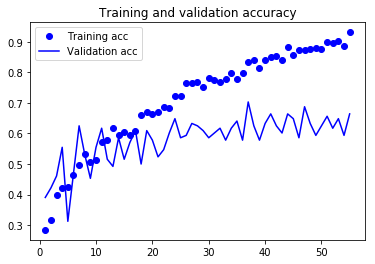

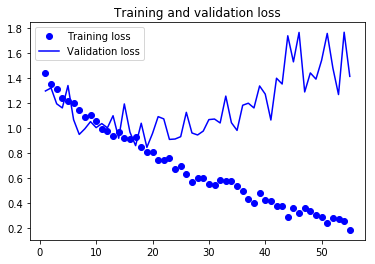

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()